In [7]:
import pandas as pd, numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt, re

In [8]:
df = pd.read_csv("/content/Nat_Gas.csv", dtype=str)
df.columns = [re.sub(r'^\ufeff','',c).strip() for c in df.columns]

In [9]:
date_col = next((c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()), df.columns[0])
df['Date'] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=['Date']).sort_values('Date').set_index('Date')

/tmp/ipython-input-3551001845.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df[date_col], errors='coerce')


In [10]:
price_col = next((c for c in df.columns if c.lower() in ('price','close','last')), None)
if price_col is None:
    nums = [c for c in df.columns if pd.to_numeric(df[c], errors='coerce').notna().sum()>0 and 'date' not in c.lower()]
    price_col = nums[0] if nums else None
if price_col is None:
    raise KeyError("No price-like numeric column found. Check df.columns.")

df[price_col] = pd.to_numeric(df[price_col], errors='coerce')
df = df.dropna(subset=[price_col])

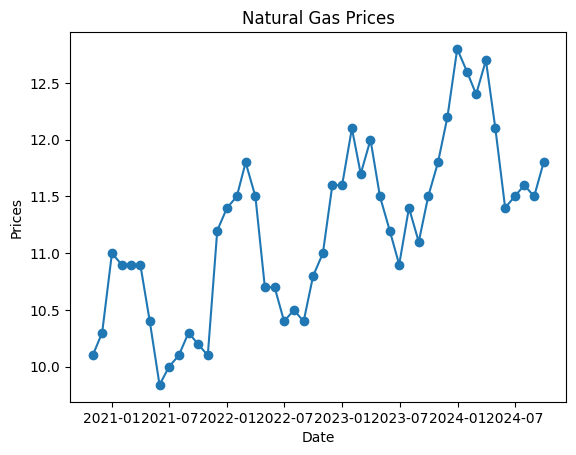

In [11]:
plt.plot(df.index, df[price_col], marker='o'); plt.title("Natural Gas Prices"); plt.xlabel("Date"); plt.ylabel(price_col); plt.show()


In [12]:
X = np.arange(len(df)).reshape(-1,1)
model = LinearRegression().fit(X, df[price_col].values)
future_X = np.arange(len(df), len(df)+12).reshape(-1,1)
future_dates = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
pred = model.predict(future_X)
for d,p in zip(future_dates, pred): print(d.date(), "→", round(float(p),2))

2024-10-31 → 12.16
2024-11-30 → 12.2
2024-12-31 → 12.24
2025-01-31 → 12.28
2025-02-28 → 12.32
2025-03-31 → 12.36
2025-04-30 → 12.4
2025-05-31 → 12.44
2025-06-30 → 12.48
2025-07-31 → 12.51
2025-08-31 → 12.55
2025-09-30 → 12.59


/tmp/ipython-input-2162369335.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
